In [1]:
import pandas as pd
import numpy as np
import pandas.io.sql as sqlio
import psycopg2 as ps

In [2]:
conn=ps.connect(dbname='capstone_project',
               user='postgres',
               password='12345',
               port=5432)

In [3]:
sqlemp_perf_a="""SELECT em.title,
       em.employee_id, 
       CONCAT(em.first_name, ' ', em.last_name) AS full_name,
       DATE_PART('year', AGE(em.hire_date, em.birth_date)) AS age_at_hire,
       COUNT(o.order_id) AS order_count
FROM employees AS em
JOIN orders AS o ON o.employee_id = em.employee_id
GROUP BY em.title, em.employee_id, em.first_name, em.last_name, age_at_hire
ORDER BY order_count desc"""

In [4]:
df=sqlio.read_sql_query(sqlemp_perf_a,conn)
df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15808\2123088851.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=sqlio.read_sql_query(sqlemp_perf_a,conn)


,title,employee_id,full_name,age_at_hire,order_count
0,Sales Representative,4,Margaret Peacock,55.0,156
1,Sales Representative,3,Janet Leverling,28.0,127
2,Sales Representative,1,Nancy Davolio,43.0,123
3,Inside Sales Coordinator,8,Laura Callahan,36.0,104
4,"Vice President, Sales",2,Andrew Fuller,40.0,96
5,Sales Representative,7,Robert King,33.0,72
6,Sales Representative,6,Michael Suyama,30.0,67
7,Sales Representative,9,Anne Dodsworth,28.0,43
8,Sales Manager,5,Steven Buchanan,38.0,42


In [5]:
t_supliers="""select * from suppliers"""

In [6]:
supliers=sqlio.read_sql_query(t_supliers,conn)
supliers

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15808\1628225392.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  supliers=sqlio.read_sql_query(t_supliers,conn)


,supplier_id,company_name,contact_name,contact_title,address,city,region,postal_code,country,phone,fax,home_page
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,None,EC1 4SD,UK,(171) 555-2222,None,None
1,2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,LA,70117,USA,(100) 555-4822,None,#CAJUN.HTM#
2,3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,707 Oxford Rd.,Ann Arbor,MI,48104,USA,(313) 555-5735,(313) 555-3349,None
3,4,Tokyo Traders,Yoshi Nagase,Marketing Manager,9-8 Sekimai Musashino-shi,Tokyo,None,100,Japan,(03) 3555-5011,None,None
4,5,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Export Administrator,Calle del Rosal 4,Oviedo,Asturias,33007,Spain,(98) 598 76 54,None,None
5,6,Mayumi's,Mayumi Ohno,Marketing Representative,92 Setsuko Chuo-ku,Osaka,None,545,Japan,(06) 431-7877,None,Mayumi's (on the World Wide Web)#http://www.mi...
6,7,"Pavlova, Ltd.",Ian Devling,Marketing Manager,74 Rose St. Moonie Ponds,Melbourne,Victoria,3058,Australia,(03) 444-2343,(03) 444-6588,None
7,8,"Specialty Biscuits, Ltd.",Peter Wilson,Sales Representative,29 King's Way,Manchester,None,M14 GSD,UK,(161) 555-4448,None,None
8,9,PB Knäckebröd AB,Lars Peterson,Sales Agent,Kaloadagatan 13,Göteborg,None,S-345 67,Sweden,031-987 65 43,031-987 65 91,None
9,10,Refrescos Americanas LTDA,Carlos Diaz,Marketing Manager,Av. das Americanas 12.890,Sao Paulo,None,5442,Brazil,(11) 555 4640,None,None


In [7]:
ship_perf1="""select p.product_name, p.unit_price,od.quantity,o.freight, o.ship_name,o.ship_via, o.order_date 
from products as p
join order_details od on od.product_id=p.product_id
join orders as o on o.order_id=od.order_id
group by 1,2,3,4,5,6,7
order by 4 desc"""

In [8]:
ship_perf=sqlio.read_sql_query(ship_perf1,conn)
ship_perf

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15808\1229481146.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ship_perf=sqlio.read_sql_query(ship_perf1,conn)


,product_name,unit_price,quantity,freight,ship_name,ship_via,order_date
0,Aniseed Syrup,10.00,60,1007.64,QUICK-Stop,3,1997-05-19
1,Côte de Blaye,263.50,30,1007.64,QUICK-Stop,3,1997-05-19
2,Gumbär Gummibärchen,31.23,40,1007.64,QUICK-Stop,3,1997-05-19
3,Scottish Longbreads,12.50,35,1007.64,QUICK-Stop,3,1997-05-19
4,Camembert Pierrot,34.00,70,890.78,Queen Cozinha,2,1996-12-04
...,...,...,...,...,...,...,...
2150,Gudbrandsdalsost,36.00,15,0.12,LILA-Supermercado,1,1996-09-03
2151,Pavlova,17.45,30,0.12,LILA-Supermercado,1,1996-09-03
2152,Queso Cabrales,21.00,12,0.12,LILA-Supermercado,1,1996-09-03
2153,Alice Mutton,39.00,6,0.02,La corne d'abondance,2,1998-03-24


In [9]:
from scipy import stats

In [10]:
ship_perf['z_score']=np.abs(stats.zscore(ship_perf['freight']))
aykırı_deger=ship_perf[ship_perf['z_score']>3]
aykırı_deger

,product_name,unit_price,quantity,freight,ship_name,ship_via,order_date,z_score
0,Aniseed Syrup,10.00,60,1007.64,QUICK-Stop,3,1997-05-19,6.853959
1,Côte de Blaye,263.50,30,1007.64,QUICK-Stop,3,1997-05-19,6.853959
2,Gumbär Gummibärchen,31.23,40,1007.64,QUICK-Stop,3,1997-05-19,6.853959
3,Scottish Longbreads,12.50,35,1007.64,QUICK-Stop,3,1997-05-19,6.853959
4,Camembert Pierrot,34.00,70,890.78,Queen Cozinha,2,1996-12-04,5.975183
5,Côte de Blaye,263.50,40,890.78,Queen Cozinha,2,1996-12-04,5.975183
6,Mozzarella di Giovanni,34.80,42,890.78,Queen Cozinha,2,1996-12-04,5.975183
7,Sir Rodney's Marmalade,81.00,12,890.78,Queen Cozinha,2,1996-12-04,5.975183
8,Chang,19.00,100,830.75,Save-a-lot Markets,2,1998-04-17,5.523763
9,Chef Anton's Gumbo Mix,21.35,70,830.75,Save-a-lot Markets,2,1998-04-17,5.523763


In [11]:
Q1=ship_perf['freight'].quantile(0.25)
Q3=ship_perf['freight'].quantile(0.75)
IQR = Q3 - Q1
alt_limit = Q1 - 1.5 * IQR
ust_limit = Q3 + 1.5 * IQR
aykiri_degerler = ship_perf[(ship_perf['freight'] < alt_limit) | (ship_perf['freight'] > ust_limit)]
aykiri_degerler

,product_name,unit_price,quantity,freight,ship_name,ship_via,order_date,z_score
0,Aniseed Syrup,10.00,60,1007.64,QUICK-Stop,3,1997-05-19,6.853959
1,Côte de Blaye,263.50,30,1007.64,QUICK-Stop,3,1997-05-19,6.853959
2,Gumbär Gummibärchen,31.23,40,1007.64,QUICK-Stop,3,1997-05-19,6.853959
3,Scottish Longbreads,12.50,35,1007.64,QUICK-Stop,3,1997-05-19,6.853959
4,Camembert Pierrot,34.00,70,890.78,Queen Cozinha,2,1996-12-04,5.975183
...,...,...,...,...,...,...,...,...
150,Gudbrandsdalsost,36.00,9,275.79,QUICK-Stop,2,1998-03-19,1.350517
151,Konbu,6.00,77,275.79,QUICK-Stop,2,1998-03-19,1.350517
152,Lakkalikööri,18.00,44,275.79,QUICK-Stop,2,1998-03-19,1.350517
153,Perth Pasties,32.80,20,275.79,QUICK-Stop,2,1998-03-19,1.350517


In [13]:
import matplotlib.pyplot as plt

In [17]:
from matplotlib.colors import LinearSegmentedColormap

In [19]:
import seaborn as sns

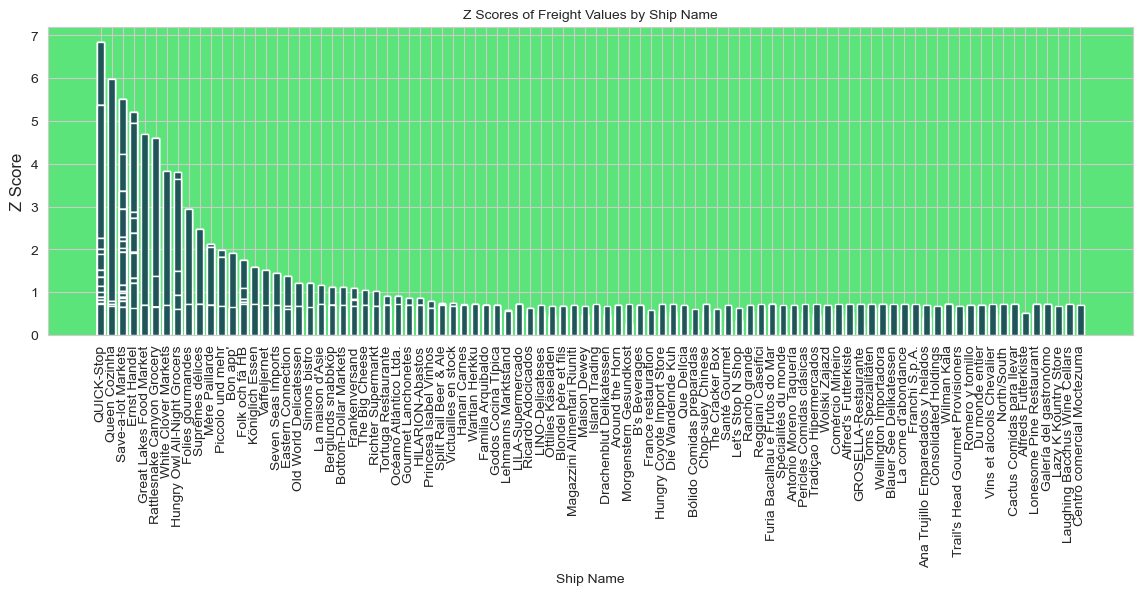

In [20]:
plt.figure(figsize=(14, 4))
sns.set_style('whitegrid')  # Arka plan stilini ayarlama
color_licensed= '#486546'
plt.bar(ship_perf['ship_name'], ship_perf['z_score'], color='#1F5459',width=0.6)

# Grafik ayarları
plt.xlabel('Ship Name', fontsize=10)
plt.ylabel('Z Score', fontsize=12)
plt.title('Z Scores of Freight Values by Ship Name', fontsize=10)
plt.xticks(rotation=90)
plt.gca().set_facecolor('#5BE479')
plt.show()

In [21]:
# order_date sütununu datetime formatına çevirme
ship_perf['order_date'] = pd.to_datetime(ship_perf['order_date'])

# 1998 yılına göre veriyi filtreleme
df_1998 = ship_perf[ship_perf['order_date'].dt.year == 1998]

# Q1, Q3 ve IQR hesaplama (1998 yılı için)
Q1 = df_1998['freight'].quantile(0.25)
Q3 = df_1998['freight'].quantile(0.75)
IQR = Q3 - Q1

# Aykırı değer sınırlarını belirleme
alt_limit = Q1 - 1.5 * IQR
ust_limit = Q3 + 1.5 * IQR

# Aykırı değerleri tespit etme (1998 yılı için)
aykiri_degerler_1998 = df_1998[(df_1998['freight'] < alt_limit) | (df_1998['freight'] > ust_limit)]

# Aykırı değerleri yazdırma
aykiri_degerler_1998


,product_name,unit_price,quantity,freight,ship_name,ship_via,order_date,z_score
8,Chang,19.00,100,830.75,Save-a-lot Markets,2,1998-04-17,5.523763
9,Chef Anton's Gumbo Mix,21.35,70,830.75,Save-a-lot Markets,2,1998-04-17,5.523763
10,Raclette Courdavault,55.00,100,830.75,Save-a-lot Markets,2,1998-04-17,5.523763
11,Thüringer Rostbratwurst,123.79,60,830.75,Save-a-lot Markets,2,1998-04-17,5.523763
22,Aniseed Syrup,10.00,25,754.26,Ernst Handel,2,1998-04-13,4.948566
...,...,...,...,...,...,...,...,...
150,Gudbrandsdalsost,36.00,9,275.79,QUICK-Stop,2,1998-03-19,1.350517
151,Konbu,6.00,77,275.79,QUICK-Stop,2,1998-03-19,1.350517
152,Lakkalikööri,18.00,44,275.79,QUICK-Stop,2,1998-03-19,1.350517
153,Perth Pasties,32.80,20,275.79,QUICK-Stop,2,1998-03-19,1.350517


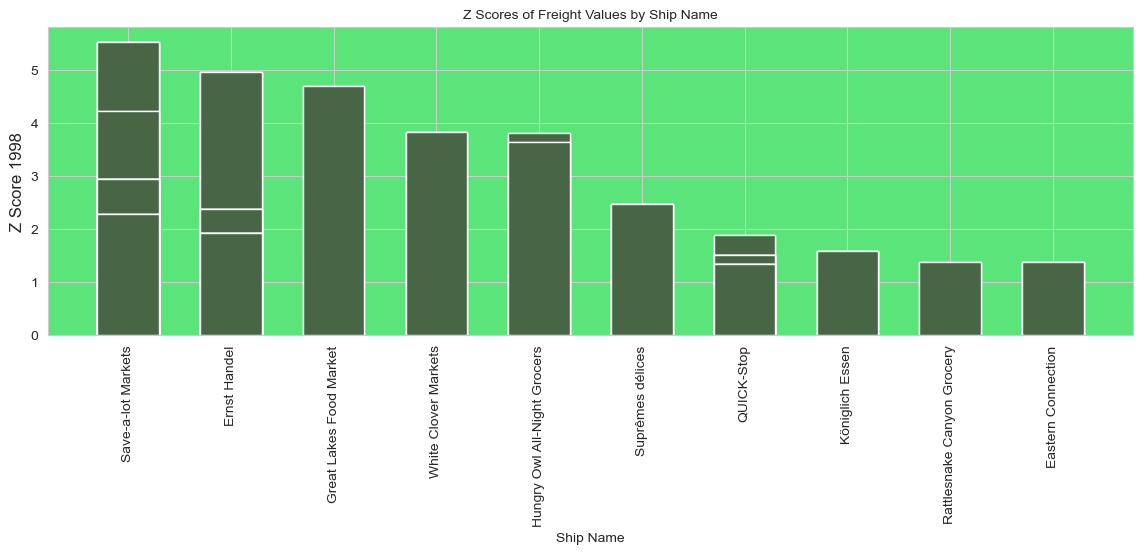

In [22]:
plt.figure(figsize=(14, 4))
sns.set_style('whitegrid')  # Arka plan stilini ayarlama
color_licensed= '#486546'
plt.bar(aykiri_degerler_1998['ship_name'], aykiri_degerler_1998['z_score'], color='#486546',width=0.6)

# Grafik ayarları
plt.xlabel('Ship Name', fontsize=10)
plt.ylabel('Z Score 1998', fontsize=12)
plt.title('Z Scores of Freight Values by Ship Name', fontsize=10)
plt.xticks(rotation=90)
plt.gca().set_facecolor('#5BE479')
plt.show()

In [23]:
# order_date sütununu datetime formatına çevirme
ship_perf['order_date'] = pd.to_datetime(ship_perf['order_date'])

# 1997 yılına göre veriyi filtreleme
df_1997 = ship_perf[ship_perf['order_date'].dt.year == 1997]

# Q1, Q3 ve IQR hesaplama (1997 yılı için)
Q1 = df_1997['freight'].quantile(0.25)
Q3 = df_1997['freight'].quantile(0.75)
IQR = Q3 - Q1

# Aykırı değer sınırlarını belirleme
alt_limit = Q1 - 1.5 * IQR
ust_limit = Q3 + 1.5 * IQR

# Aykırı değerleri tespit etme (1997 yılı için)
aykiri_degerler_1997 = df_1997[(df_1997['freight'] < alt_limit) | (df_1997['freight'] > ust_limit)]

# Aykırı değerleri yazdırma
aykiri_degerler_1997


,product_name,unit_price,quantity,freight,ship_name,ship_via,order_date,z_score
0,Aniseed Syrup,10.00,60,1007.64,QUICK-Stop,3,1997-05-19,6.853959
1,Côte de Blaye,263.50,30,1007.64,QUICK-Stop,3,1997-05-19,6.853959
2,Gumbär Gummibärchen,31.23,40,1007.64,QUICK-Stop,3,1997-05-19,6.853959
3,Scottish Longbreads,12.50,35,1007.64,QUICK-Stop,3,1997-05-19,6.853959
12,Chai,18.00,30,810.05,QUICK-Stop,2,1997-10-03,5.368101
...,...,...,...,...,...,...,...,...
132,Rössle Sauerkraut,45.60,60,299.09,Vaffeljernet,2,1997-10-01,1.525731
133,Sasquatch Ale,14.00,14,299.09,Vaffeljernet,2,1997-10-01,1.525731
139,Inlagd Sill,19.00,6,296.43,Hungry Owl All-Night Grocers,2,1997-09-30,1.505728
140,Mishi Kobe Niku,97.00,50,296.43,Hungry Owl All-Night Grocers,2,1997-09-30,1.505728


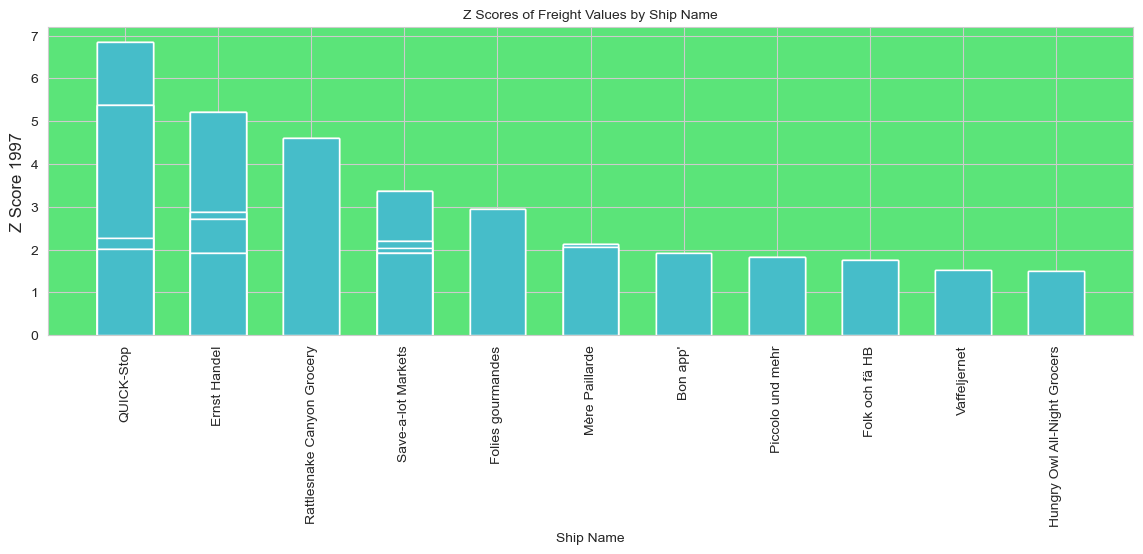

In [24]:
plt.figure(figsize=(14, 4))
sns.set_style('whitegrid')  # Arka plan stilini ayarlama
color_licensed= '#486546'
plt.bar(aykiri_degerler_1997['ship_name'], aykiri_degerler_1997['z_score'], color='#46BDC9',width=0.6)

# Grafik ayarları
plt.xlabel('Ship Name', fontsize=10)
plt.ylabel('Z Score 1997', fontsize=12)
plt.title('Z Scores of Freight Values by Ship Name', fontsize=10)
plt.xticks(rotation=90)
plt.gca().set_facecolor('#5BE479')
plt.show()

In [25]:
# order_date sütununu datetime formatına çevirme
ship_perf['order_date'] = pd.to_datetime(ship_perf['order_date'])

# 1996 yılına göre veriyi filtreleme
df_1996 = ship_perf[ship_perf['order_date'].dt.year == 1996]

# Q1, Q3 ve IQR hesaplama (1997 yılı için)
Q1 = df_1996['freight'].quantile(0.25)
Q3 = df_1996['freight'].quantile(0.75)
IQR = Q3 - Q1

# Aykırı değer sınırlarını belirleme
alt_limit = Q1 - 1.5 * IQR
ust_limit = Q3 + 1.5 * IQR

# Aykırı değerleri tespit etme (1997 yılı için)
aykiri_degerler_1996 = df_1996[(df_1996['freight'] < alt_limit) | (df_1996['freight'] > ust_limit)]

# Aykırı değerleri yazdırma
aykiri_degerler_1996

,product_name,unit_price,quantity,freight,ship_name,ship_via,order_date,z_score
4,Camembert Pierrot,34.00,70,890.78,Queen Cozinha,2,1996-12-04,5.975183
5,Côte de Blaye,263.50,40,890.78,Queen Cozinha,2,1996-12-04,5.975183
6,Mozzarella di Giovanni,34.80,42,890.78,Queen Cozinha,2,1996-12-04,5.975183
7,Sir Rodney's Marmalade,81.00,12,890.78,Queen Cozinha,2,1996-12-04,5.975183
96,Côte de Blaye,263.50,50,360.63,Piccolo und mehr,3,1996-11-13,1.988506
97,Queso Cabrales,21.00,12,360.63,Piccolo und mehr,3,1996-11-13,1.988506
142,Camembert Pierrot,34.00,80,288.43,Seven Seas Imports,3,1996-11-21,1.445568
143,Gorgonzola Telino,12.50,70,288.43,Seven Seas Imports,3,1996-11-21,1.445568
144,Pavlova,17.45,56,288.43,Seven Seas Imports,3,1996-11-21,1.445568
164,Carnarvon Tigers,62.50,25,257.62,Old World Delicatessen,3,1996-09-13,1.213880


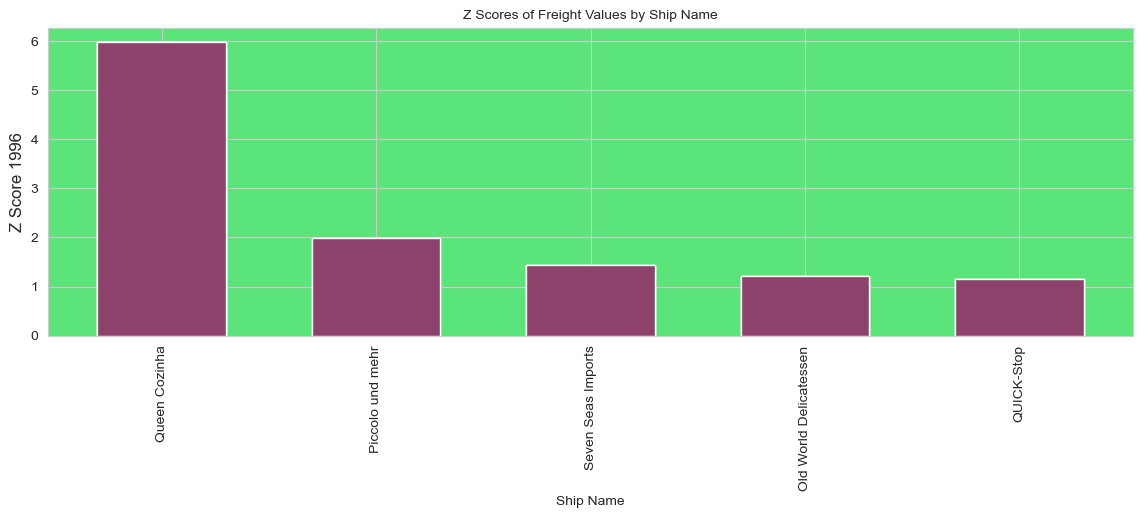

In [26]:
plt.figure(figsize=(14, 4))
sns.set_style('whitegrid')  # Arka plan stilini ayarlama
color_licensed= '#486546'
plt.bar(aykiri_degerler_1996['ship_name'], aykiri_degerler_1996['z_score'], color='#8C426B',width=0.6)

# Grafik ayarları
plt.xlabel('Ship Name', fontsize=10)
plt.ylabel('Z Score 1996', fontsize=12)
plt.title('Z Scores of Freight Values by Ship Name', fontsize=10)
plt.xticks(rotation=90)
plt.gca().set_facecolor('#5BE479')
plt.show()

In [27]:
sayısal_deg_tab="""select p.unit_price,od.quantity,o.freight, o.ship_via, od.discount 
from products as p
join order_details od on od.product_id=p.product_id
join orders as o on o.order_id=od.order_id
group by 1,2,3,4,5
order by 3 desc"""

In [28]:
sayısal_deg_corr=sqlio.read_sql_query(sayısal_deg_tab,conn)
sayısal_deg_corr

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15808\1245427984.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sayısal_deg_corr=sqlio.read_sql_query(sayısal_deg_tab,conn)


,unit_price,quantity,freight,ship_via,discount
0,10.00,60,1007.64,3,0.00
1,12.50,35,1007.64,3,0.00
2,31.23,40,1007.64,3,0.00
3,263.50,30,1007.64,3,0.00
4,34.00,70,890.78,2,0.25
...,...,...,...,...,...
2150,17.45,30,0.12,1,0.00
2151,21.00,12,0.12,1,0.00
2152,36.00,15,0.12,1,0.00
2153,2.50,7,0.02,2,0.00


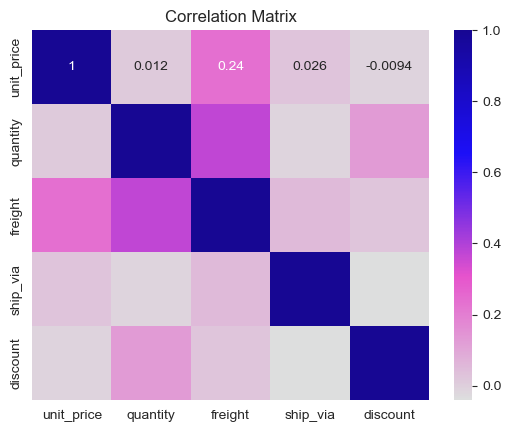

In [29]:
color_corr = LinearSegmentedColormap.from_list('custom_corr', ['#DDDEDE','#E653CC','#1C0FF7', '#170793'])
corr_matrix = sayısal_deg_corr.corr()
sns.heatmap(corr_matrix, annot=True, cmap=color_corr)
plt.title('Correlation Matrix')
plt.show()

In [30]:
cal_perf_anl_tab="""SELECT em.title,
       em.employee_id, 
       CONCAT(em.first_name, ' ', em.last_name) AS full_name,
       DATE_PART('year', AGE(max(o.order_date), em.hire_date)) AS cal_suresi,
       COUNT(o.order_id) AS order_count
FROM employees AS em
JOIN orders AS o ON o.employee_id = em.employee_id
GROUP BY em.title, em.employee_id, em.first_name, em.last_name, em.hire_date
ORDER BY cal_suresi DESC;"""

In [31]:
cal_perf_anl=sqlio.read_sql_query(cal_perf_anl_tab,conn)
cal_perf_anl

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15808\3905607793.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cal_perf_anl=sqlio.read_sql_query(cal_perf_anl_tab,conn)


,title,employee_id,full_name,cal_suresi,order_count
0,Sales Representative,3,Janet Leverling,6.0,127
1,Sales Representative,1,Nancy Davolio,6.0,123
2,"Vice President, Sales",2,Andrew Fuller,5.0,96
3,Sales Representative,4,Margaret Peacock,5.0,156
4,Sales Manager,5,Steven Buchanan,4.0,42
5,Sales Representative,7,Robert King,4.0,72
6,Inside Sales Coordinator,8,Laura Callahan,4.0,104
7,Sales Representative,6,Michael Suyama,4.0,67
8,Sales Representative,9,Anne Dodsworth,3.0,43


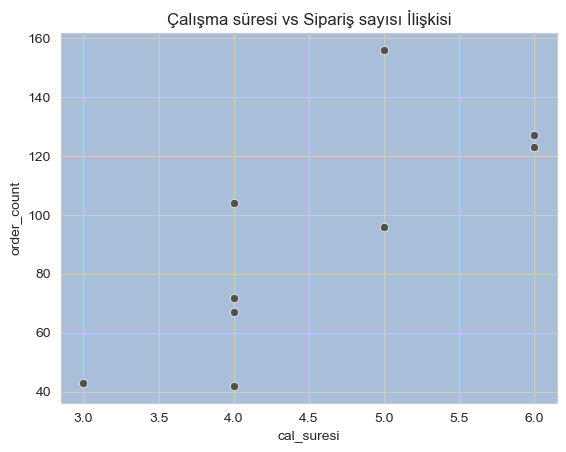

In [32]:
sns.scatterplot(x='cal_suresi', y='order_count', data=cal_perf_anl, color='#525252')  # Noktaların rengini 'skyblue' yaptık

# Arka plan rengini ayarla
plt.gca().set_facecolor('#A9BED9')  # Arka plan rengini 'lightgray' yaptık

# Başlık
plt.title('Çalışma süresi vs Sipariş sayısı İlişkisi')

# Grafiği göster
plt.show()